## <u><i><FONT COLOR="BLUE">Problem Statement</i></u>

BoomBikes wants to understand the factors on which the demand for these shared bikes depends. They want to understand the factors affecting the demand for these shared bikes in the American market. 

The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### <u><i><FONT COLOR="BLUE">Business Goal</i></u>

A model to capture the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### <u><i><FONT COLOR="BLUE">Model Evaluation</i></u>

Make sure you use the following two lines of code to calculate the R-squared score on the test set.


<i>
<FONT COLOR="#009900">
from sklearn.metrics import r2_score <br/>
r2_score(y_test, y_pred)</i>

## <u><i><FONT COLOR="BLUE">Steps Followed:</i></u>
    
- Data Understanding
- Data Preprocessing
    - Drop columns
    - Map Categorical values
- EDA
- Create Dummy variables
- Train-Test Split
- Scaling
- Feature Selection
- Model Building
- Evaluation


#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Importing dataset

In [2]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Converting dteday to pandas datetime format
bike['dteday'] = pd.to_datetime(bike['dteday'])

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking shape and other general information of data

print("Shape of data is: ", bike.shape)

Shape of data is:  (730, 16)


In [5]:
bike.info()
#Checking the information, we conclude that there are no null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [6]:
#Making a copy of original data to work on it:
bike_df = bike.copy()

In [7]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Dropping causal and registered column - as the details are captured in cnt (sum of both columns and also it is the target variable)
bike_df.drop(columns=['casual','registered'],axis=1,inplace=True)

In [9]:
#Dropping dteday column as the details about month and year are captured in yr and mnth columns
bike_df.drop(columns=['dteday'],axis=1,inplace=True)

In [10]:
#Dropping instane column as it is nothing more than a serial number
bike_df.drop(columns=['instant'],axis=1,inplace=True)

#### Identifying categorical variables from data dictionary and converting the values to categorical

Useful to perform EDA on data


In [11]:
# Season
bike_df['season'] = bike_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
# Month
bike_df['mnth'] = bike_df['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})
bike_df['mnth'].value_counts()

Jan     62
Mar     62
May     62
Jul     62
Aug     62
Oct     62
Dec     62
Apr     60
Jun     60
Sept    60
Nov     60
Feb     56
Name: mnth, dtype: int64

In [13]:
# weathersit
bike_df['weathersit'] = bike_df['weathersit'].map({1:'Clear_FewClouds', 2:'Mist_Cloudy', 3:'LightRain_LightSnow_Thunderstorm', 4:'HeavyRain_IceFog'})

bike_df['weathersit'].value_counts()

Clear_FewClouds                     463
Mist_Cloudy                         246
LightRain_LightSnow_Thunderstorm     21
Name: weathersit, dtype: int64

In [14]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,Clear_FewClouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,Clear_FewClouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,Clear_FewClouds,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
print("working_day: ",bike_df['workingday'].unique())
print("Weekday: ", bike_df['weekday'].unique())
print("Holiday: ",bike_df['holiday'].unique())

working_day:  [0 1]
Weekday:  [6 0 1 2 3 4 5]
Holiday:  [0 1]


In [16]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


#### EDA
- Data Visualisation

Used to Understand the distribution of various variables and find out if there is any multicollinearity

<FONT COLOR="BLUE">Visualizing Numerical Data

In [17]:
# bike_df.select_dtypes(include='float64')
num_variables = ['temp','atemp','hum','windspeed','cnt']

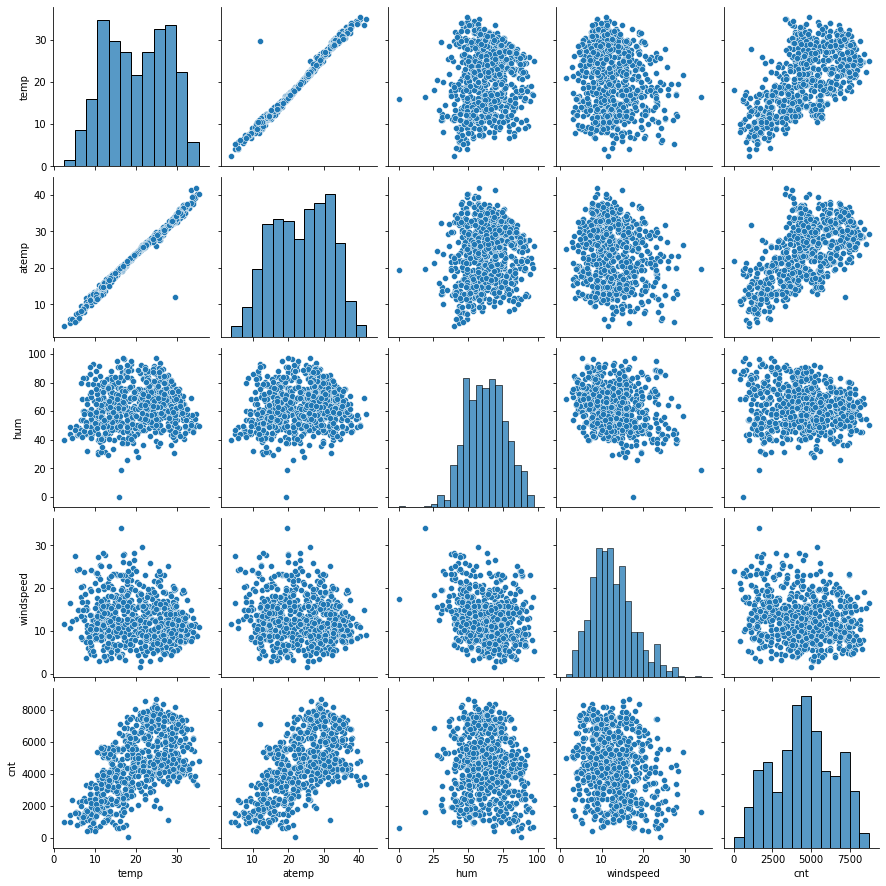

In [18]:
sns.pairplot(bike_df, vars=num_variables)
plt.show()

From the plots we can see a clear relationship between temp & atemp

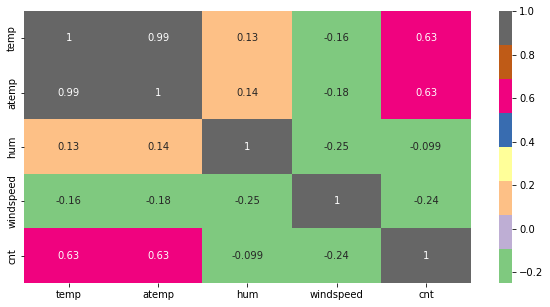

In [19]:
#Check correlation:
plt.figure(figsize=(10,5))
sns.heatmap(bike_df[num_variables].corr(), annot=True, cmap='Accent')
plt.show()

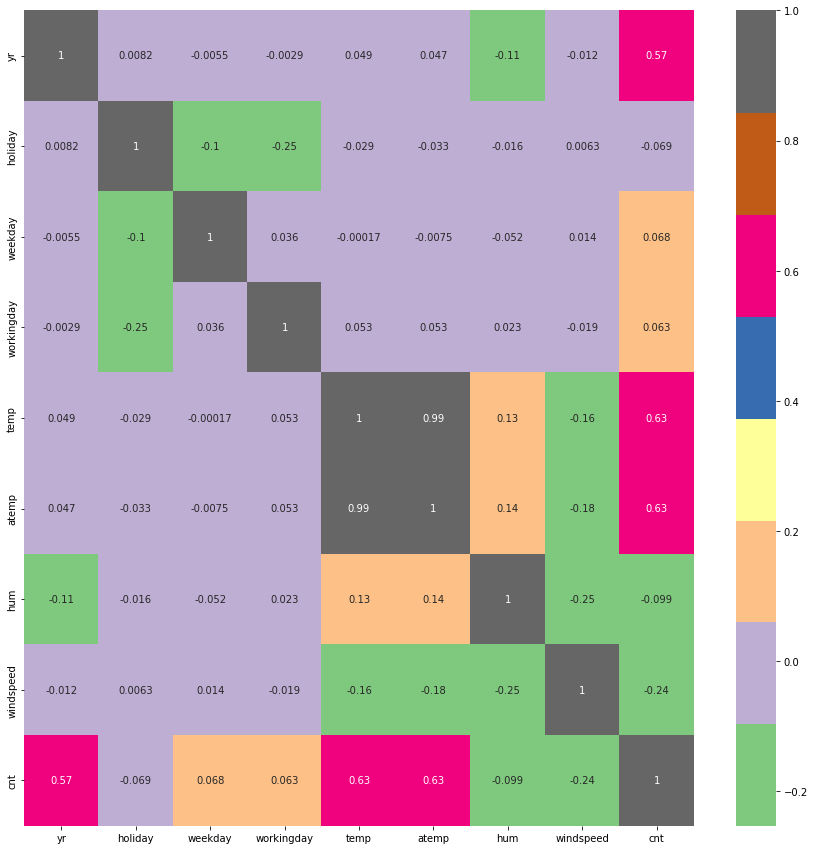

In [20]:
# cheking correlation between all the variables:
plt.figure(figsize=(15,15))
sns.heatmap(bike_df.corr(), annot=True, cmap='Accent')
plt.show()

<u><Font Color='BLUE'>Few Observations</u>

- 'cnt' is negatively related with 'holiday', 'windspeed' & 'hum' -> indicates that the shared bike demand is less on holidays, windy days and when humidity is high
- 'temp' and 'atemp' are hightly correlated

In [21]:
# As there is a high correlataion between temp & atemp -> dropping atemp 
bike_df.drop(columns=['atemp'],axis=1,inplace=True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,Clear_FewClouds,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,Clear_FewClouds,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,Clear_FewClouds,9.305237,43.6957,12.522300,1600


<FONT COLOR="BLUE">Visualizing Categorical Data

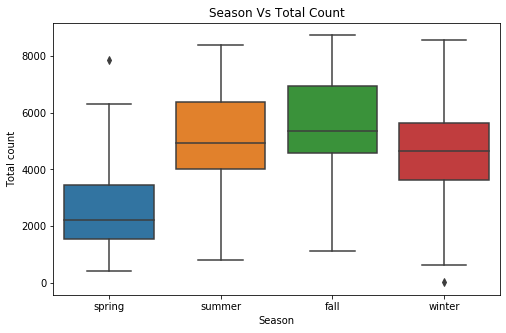

In [22]:
#season
plt.figure(figsize=(8,5))
sns.boxplot(data=bike_df, x='season', y='cnt')
plt.title("Season Vs Total Count")
plt.xlabel('Season')
plt.ylabel('Total count')
plt.show()

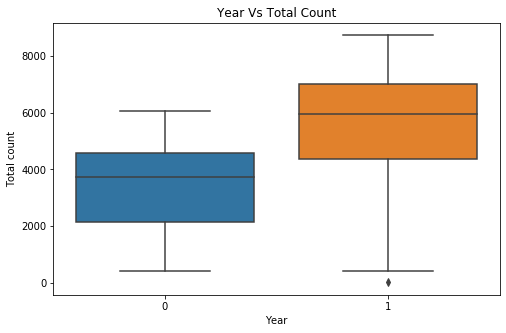

In [23]:
#year
plt.figure(figsize=(8,5))
sns.boxplot(data=bike_df, x='yr', y='cnt')
plt.title("Year Vs Total Count")
plt.xlabel('Year')
plt.ylabel('Total count')
plt.show()

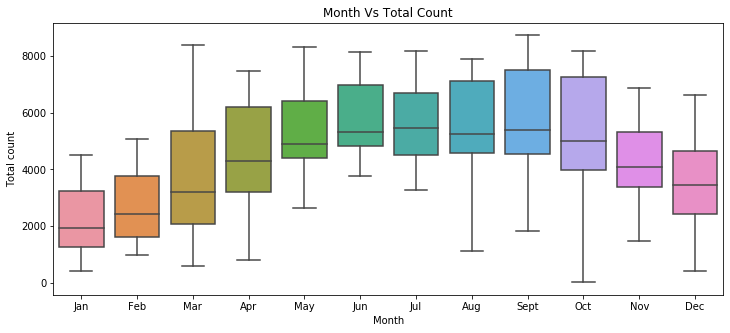

In [24]:
#Month
plt.figure(figsize=(12,5))
sns.boxplot(data=bike_df, x='mnth', y='cnt')
plt.title("Month Vs Total Count")
plt.xlabel('Month')
plt.ylabel('Total count')
plt.show()

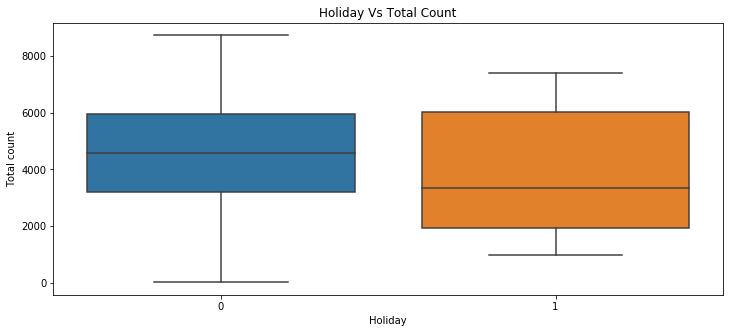

In [25]:
#Holiday
plt.figure(figsize=(12,5))
sns.boxplot(data=bike_df, x='holiday', y='cnt')
plt.title("Holiday Vs Total Count")
plt.xlabel('Holiday')
plt.ylabel('Total count')
plt.show()

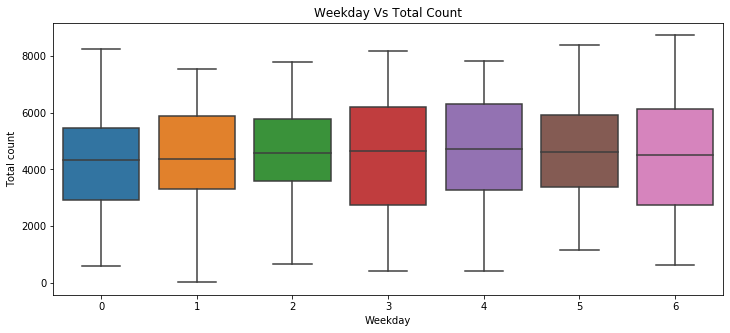

In [26]:
#Weekday
plt.figure(figsize=(12,5))
sns.boxplot(data=bike_df, x='weekday', y='cnt')
plt.title("Weekday Vs Total Count")
plt.xlabel('Weekday')
plt.ylabel('Total count')
plt.show()

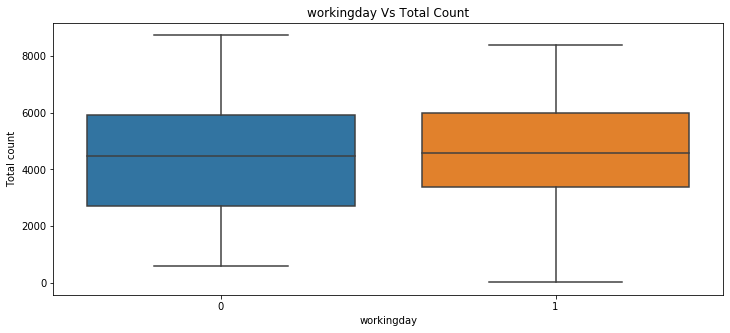

In [27]:
#workingday
plt.figure(figsize=(12,5))
sns.boxplot(data=bike_df, x='workingday', y='cnt')
plt.title("workingday Vs Total Count")
plt.xlabel('workingday')
plt.ylabel('Total count')
plt.show()

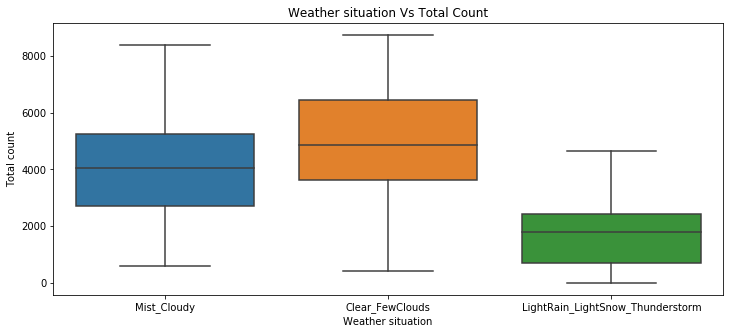

In [28]:
#weather situation
plt.figure(figsize=(12,5))
sns.boxplot(data=bike_df, x='weathersit', y='cnt')
plt.title("Weather situation Vs Total Count")
plt.xlabel('Weather situation')
plt.ylabel('Total count')
plt.show()

<u><Font Color='BLUE'>Few Observations: Categorical Variables</u>

- The shared bike demand is less in the spring season.
- The shared bike demand is more if it is a working day.
- The shared bike demand is less on days when it is raining or is snowy.

#### <Font color = "Blue">Creating Dummy Variables

In [29]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 62.9+ KB


In [30]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,Clear_FewClouds,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,Clear_FewClouds,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,Clear_FewClouds,9.305237,43.6957,12.522300,1600


In [31]:
# Convert weekday as object type
bike_df['weekday']=bike_df['weekday'].astype(object)

In [32]:
cat_variables = bike_df.select_dtypes(include=['object'])

In [33]:
bike_df_dummies = pd.get_dummies(cat_variables,drop_first=True)
bike_df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_LightRain_LightSnow_Thunderstorm,weathersit_Mist_Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
#drop categorical variables from bike_df

bike_df = bike_df.drop(columns=list(cat_variables.columns), axis=1)
bike_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,1,9.305237,43.6957,12.522300,1600


In [35]:
#concat dummy variables
bike_df_final = pd.concat([bike_df,bike_df_dummies],axis=1)
bike_df_final.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_LightRain_LightSnow_Thunderstorm,weathersit_Mist_Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
bike_df_final.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy'],
      dtype='object')

#### <Font color = "Blue">Splitting data into train & test data

In [37]:
df_train, df_test = train_test_split(bike_df_final, train_size=0.8, random_state=10)
print("Training data size: ", df_train.shape)
print("Test data size: ",df_test.shape)

Training data size:  (584, 29)
Test data size:  (146, 29)


#### <Font color = "Blue">Rescaling the features

In [38]:
scaler = MinMaxScaler()

In [39]:
# Apply scaler() to all num variables except dummy variables & 'yes-no' variables
num_var_scale = ['temp','hum', 'windspeed', 'cnt']
num_var_scale

['temp', 'hum', 'windspeed', 'cnt']

In [40]:
df_train[num_var_scale] = scaler.fit_transform(df_train[num_var_scale])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_LightRain_LightSnow_Thunderstorm,weathersit_Mist_Cloudy
176,0,0,0,0.773634,0.527849,0.148724,0.607800,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,0,0,1,0.840090,0.727506,0.308966,0.515992,0,0,0,...,0,0,0,0,1,0,0,0,0,0
142,0,0,1,0.713409,0.832905,0.435916,0.489185,0,1,0,...,0,0,1,0,0,0,0,0,0,1
237,0,0,1,0.798555,0.782776,0.126931,0.533709,0,0,0,...,0,0,0,0,0,0,1,0,0,0
531,1,0,0,0.713409,0.518424,0.297431,0.883571,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,584.0,0.493151,0.500382,0.0,0.000000,0.000000,1.000000,1.0
holiday,584.0,0.032534,0.177566,0.0,0.000000,0.000000,0.000000,1.0
workingday,584.0,0.688356,0.463562,0.0,0.000000,1.000000,1.000000,1.0
temp,584.0,0.542347,0.224823,0.0,0.352833,0.537404,0.740406,1.0
hum,584.0,0.646984,0.149899,0.0,0.533848,0.648671,0.755407,1.0
windspeed,584.0,0.343075,0.159616,0.0,0.229498,0.317952,0.431426,1.0
cnt,584.0,0.513052,0.224458,0.0,0.356851,0.514784,0.685285,1.0
season_spring,584.0,0.248288,0.432390,0.0,0.000000,0.000000,0.000000,1.0
season_summer,584.0,0.261986,0.440092,0.0,0.000000,0.000000,1.000000,1.0
season_winter,584.0,0.246575,0.431387,0.0,0.000000,0.000000,0.000000,1.0


<font color = 'blue'>Dividing into X and Y sets for the model building

In [42]:
y_train = df_train.pop('cnt')
X_train = df_train

In [43]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_LightRain_LightSnow_Thunderstorm,weathersit_Mist_Cloudy
176,0,0,0,0.773634,0.527849,0.148724,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,0,0,1,0.840090,0.727506,0.308966,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
142,0,0,1,0.713409,0.832905,0.435916,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
237,0,0,1,0.798555,0.782776,0.126931,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
531,1,0,0,0.713409,0.518424,0.297431,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### <u><font color='blue'>Building a linear model</u>

In [44]:
# Adding constant to X_train
X_train_all_vars = sm.add_constant(X_train)
X_train_all_vars.head(2)

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_LightRain_LightSnow_Thunderstorm,weathersit_Mist_Cloudy
176,1.0,0,0,0,0.773634,0.527849,0.148724,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,1.0,0,0,1,0.840090,0.727506,0.308966,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [45]:
# Building the model with all the features
lm_all_vars = sm.OLS(y_train, X_train_all_vars).fit()
print(lm_all_vars.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     114.9
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.21e-207
Time:                        00:20:05   Log-Likelihood:                 594.53
No. Observations:                 584   AIC:                            -1133.
Df Residuals:                     556   BIC:                            -1011.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

<font color='blue'>Feature Selection using RFE

In [46]:
# Using RFE approach for feature selection
# There are total 28 variables, lets start with selecting 18 variables

lr = LinearRegression()
lr.fit(X_train,y_train)

rfe = RFE(lr,n_features_to_select=18)
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 3),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 6),
 ('mnth_Mar', False, 4),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 8),
 ('mnth_Sept', True, 1),
 ('weekday_1', False, 2),
 ('weekday_2', False, 11),
 ('weekday_3', False, 9),
 ('weekday_4', False, 10),
 ('weekday_5', False, 5),
 ('weekday_6', True, 1),
 ('weathersit_LightRain_LightSnow_Thunderstorm', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [48]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_May', 'mnth_Nov', 'mnth_Sept', 'weekday_6',
       'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [49]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_Oct',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

#### <u><font color='blue'>Building model from statsmodel for details stats</u>

In [50]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [51]:
#Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head(2)

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sept,weekday_6,weathersit_LightRain_LightSnow_Thunderstorm,weathersit_Mist_Cloudy
176,1.0,0,0,0,0.773634,0.527849,0.148724,0,0,0,0,0,0,0,0,0,0,0,0
172,1.0,0,0,1,0.840090,0.727506,0.308966,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
#Running the linear model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [53]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     172.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          6.30e-216
Time:                        00:20:06   Log-Likelihood:                 591.02
No. Observations:                 584   AIC:                            -1144.
Df Residuals:                     565   BIC:                            -1061.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

<font color = 'blue'>The new model built after feature selection using RFE does not show much change in the accuracy as compared to the model built using all the features. 
    
Lets now check the multicollinearity among these variables 

In [54]:
#Dropping constant variable before checking VIF
X_train_rfe1 = X_train_rfe.drop('const',axis=1)

In [55]:
# Check for VIF values of the feature variables
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,26.15
3,temp,18.63
2,workingday,5.61
5,windspeed,5.15
6,season_spring,4.55
7,season_winter,3.03
10,mnth_Jan,2.34
17,weathersit_Mist_Cloudy,2.29
9,mnth_Feb,2.09
0,yr,2.00


<font color = 'blue'>We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

#### <u><font color = 'blue'>Dropping the variable and updating the model</u>
As you can see from the VIF dataframe, some variables are still insignificant. One of these variables is, hum as it has a very high VIF of 26.15. Let's go ahead and drop this variable

In [56]:
X = X_train_rfe1.drop(columns='hum', axis=1)
X.head(2)

,yr,holiday,workingday,temp,windspeed,season_spring,season_winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sept,weekday_6,weathersit_LightRain_LightSnow_Thunderstorm,weathersit_Mist_Cloudy
176,0,0,0,0.773634,0.148724,0,0,0,0,0,0,0,0,0,0,0,0
172,0,0,1,0.840090,0.308966,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
# Build the 3rd fitted model:
X_train_model3 = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_model3).fit()

In [58]:
#Print the summary
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     173.9
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.08e-211
Time:                        00:20:06   Log-Likelihood:                 578.19
No. Observations:                 584   AIC:                            -1120.
Df Residuals:                     566   BIC:                            -1042.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [59]:
# Using RFE approach again for feature selection 
# There are total 28 variables, lets start with selecting 12 variables

lr_2 = LinearRegression()
lr_2.fit(X_train_model3,y_train)

rfe2 = RFE(lr_2, n_features_to_select=12)
rfe2 = rfe2.fit(X_train_model3, y_train)

In [60]:
list(zip(X_train_model3.columns, rfe2.support_, rfe2.ranking_))

[('const', False, 7),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_winter', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Sept', False, 3),
 ('weekday_6', False, 4),
 ('weathersit_LightRain_LightSnow_Thunderstorm', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [61]:
col = X_train_model3.columns[rfe2.support_]
col

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy'],
      dtype='object')

<font color='blue'> Building model again using these newly selected features

In [62]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe2 = X_train_model3[col]
X_train_rfe2.head(2)

,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,weathersit_LightRain_LightSnow_Thunderstorm,weathersit_Mist_Cloudy
176,0,0,0.773634,0.148724,0,0,0,0,0,0,0,0
172,0,0,0.840090,0.308966,0,0,0,0,0,0,0,0


In [63]:
# Build the 4th fitted model:
#Adding a constant variable
X_train_model4 = sm.add_constant(X_train_rfe2)

lr_4 = sm.OLS(y_train, X_train_model4).fit()

#Print the summary
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          3.56e-211
Time:                        00:20:06   Log-Likelihood:                 563.11
No. Observations:                 584   AIC:                            -1100.
Df Residuals:                     571   BIC:                            -1043.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [64]:
#Calculating VIF again for selected features
X_train_model4 = X_train_model4.drop('const',axis=1)
# Check for VIF values of the feature variables
vif = pd.DataFrame()
vif['Features'] = X_train_model4.columns
vif['VIF'] = [variance_inflation_factor(X_train_model4.values, i) for i in range(X_train_model4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.89
2,temp,4.78
5,season_winter,2.52
4,season_spring,2.38
0,yr,1.99
9,mnth_Nov,1.81
7,mnth_Jan,1.58
11,weathersit_Mist_Cloudy,1.54
6,mnth_Dec,1.44
8,mnth_Jul,1.32


VIF for all the variable is within limits of less than 5 but We see that the p-value of variable "mnth_Jan" is more than 0.005 - hence dropping the variable "mnth_Jan"

In [65]:
X = X_train_model4.drop(columns='mnth_Jan', axis=1)
X.head(2)

,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_Dec,mnth_Jul,mnth_Nov,weathersit_LightRain_LightSnow_Thunderstorm,weathersit_Mist_Cloudy
176,0,0,0.773634,0.148724,0,0,0,0,0,0,0
172,0,0,0.840090,0.308966,0,0,0,0,0,0,0


In [66]:
# Build the 5th fitted model:
#Adding a constant variable
X_train_model5 = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_model5).fit()

#Print the summary
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     251.5
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          7.24e-211
Time:                        00:20:06   Log-Likelihood:                 559.52
No. Observations:                 584   AIC:                            -1095.
Df Residuals:                     572   BIC:                            -1043.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [67]:
#Calculating VIF again for selected features
X1 = X_train_model5.drop('const',axis=1)
# Check for VIF values of the feature variables
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.89
2,temp,4.75
5,season_winter,2.49
0,yr,1.99
8,mnth_Nov,1.80
4,season_spring,1.79
10,weathersit_Mist_Cloudy,1.53
6,mnth_Dec,1.38
7,mnth_Jul,1.32
9,weathersit_LightRain_LightSnow_Thunderstorm,1.11


<font color = 'blue'> The VIF values and p-value for all the variables seems to be under threshold limits. Also the <b>r-squared</b> and <b>adjusted r-squared</b> is <b>82.9%</b> and <b>82.5%</b> respectively using <b>11 variables</b> from inital <b>28 variables</b>.

This model is explaining most of the variance without being too complex and hence proceeding with this model.

### <font color = 'blue'>Residual Analysis

Before making predictions on the test set, we will first analyse the residuals

So, now to check if the error terms are also normally distributed, let us plot the histogram of the error terms and see what it looks like.

In [68]:
y_train_cnt = lr_5.predict(X_train_model5)

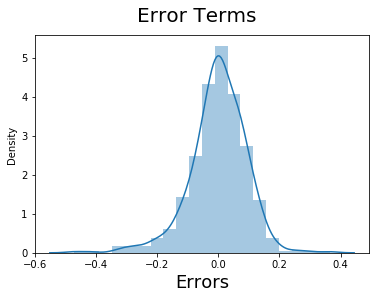

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)    
plt.xlabel('Errors', fontsize = 18)
plt.show()

<font color = 'blue'> We see that the error term is fairly normally distributed. 

### <font color='blue'>Making predictions using the final model

#### <font color='blue'>Applying the scaling on the test set

In [70]:
num_var_scale

['temp', 'hum', 'windspeed', 'cnt']

In [71]:
df_test[num_var_scale] = scaler.transform(df_test[num_var_scale])

In [72]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,146.0,0.527397,0.500967,0.000000,0.000000,1.000000,1.000000,1.000000
holiday,146.0,0.013699,0.116637,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,146.0,0.664384,0.473831,0.000000,0.000000,1.000000,1.000000,1.000000
temp,146.0,0.549872,0.241666,0.094267,0.340632,0.570632,0.777787,0.984424
hum,146.0,0.639067,0.131773,0.283633,0.539417,0.636032,0.740039,0.975076
windspeed,146.0,0.360539,0.160686,0.041051,0.260911,0.342077,0.441033,0.864144
cnt,146.0,0.528329,0.216025,0.067073,0.376726,0.545732,0.680022,0.937069
season_spring,146.0,0.239726,0.428386,0.000000,0.000000,0.000000,0.000000,1.000000
season_summer,146.0,0.212329,0.410364,0.000000,0.000000,0.000000,0.000000,1.000000
season_winter,146.0,0.232877,0.424119,0.000000,0.000000,0.000000,0.000000,1.000000


In [73]:
# Splitting into x_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [74]:
X_train_model5.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Nov',
       'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [75]:
# Adding constant to X_test
X_test_model5 = sm.add_constant(X_test)

In [76]:
# Subset X_test dataframe by selecting variables used in final model
X_test_model5 = X_test_model5[X_train_model5.columns]
X_test_model5.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Nov',
       'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [77]:
# Making predictions
y_pred_model5 = lr_5.predict(X_test_model5)

### <font color = 'blue'> Model Evaluation

<font color = 'blue'>Let's now plot the graph for actual versus predicted values.


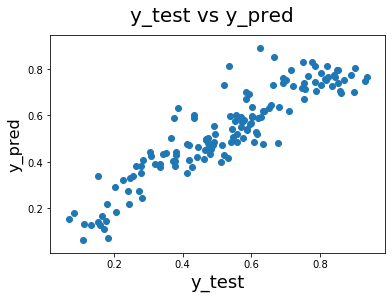

In [78]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_model5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

plt.show()

In [79]:
print(lr_5.params)

const                                          0.281992
yr                                             0.238414
holiday                                       -0.075403
temp                                           0.423336
windspeed                                     -0.139752
season_spring                                 -0.128619
season_winter                                  0.068134
mnth_Dec                                      -0.050086
mnth_Jul                                      -0.079079
mnth_Nov                                      -0.065032
weathersit_LightRain_LightSnow_Thunderstorm   -0.272090
weathersit_Mist_Cloudy                        -0.073790
dtype: float64


<font color='blue'> We can see that equation for the best fitted line is:

<b> cnt = yr * 0.2384 - holiday * 0.0754 + temp * 0.4233 - windspeed * 0.1398 - season_spring * 0.1286 + season_winter * 0.0681 - mnth_Dec * 0.0501 - mnth_Jul * 0.0791 - mnth_Nov * 0.0650 - weathersit_LightRain_LightSnow_Thunderstorm * 0.2721 - weathersit_Mist_Cloudy * 0.0738
</b>



#### <font color = 'blue'>Checking R-squared

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_model5)

0.828064791192272

<font color = 'blue'><b>Evaluation Summary</b>

- Test dataset:
    - R-squared on test dataset = 82.8%
- Train dataset
    - R-squared on training dataset = 82.9%
    - Adjusted R-squared in training dataset = 82.5%